# Lab Assignment 1

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData, PlyElement

In [2]:
# Look pretty...

matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Every 100 samples in the dataset, we save 1. If things run too slow, try increasing this number. If things run too fast, try decreasing it... =)

In [4]:
reduce_factor = 100

In [6]:
# Load up the scanned armadillo
plyfile = PlyData.read('stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

# PCA
In the method below, write code to import the libraries required for PCA.

Then, train a PCA model on the passed in armadillo dataframe parameter. Lastly, project the armadillo down to the two principal components, by dropping one dimension.

NOTE-1: Be sure to RETURN your projected armadillo rather than None! This projection will be stored in a NumPy NDArray rather than a Pandas dataframe. This is something Pandas does for you automatically =).

NOTE-2: Regarding the svd_solver parameter, simply pass that into your PCA model constructor as-is, e.g. svd_solver=svd_solver.

For additional details, please read through Decomposition - PCA.

In [15]:
def do_PCA(armadillo):
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    pca.fit(armadillo)
    T = pca.transform(armadillo)
    return T

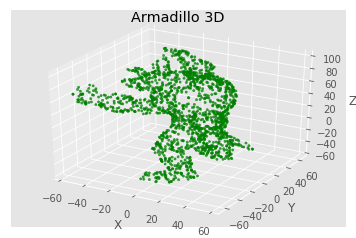

In [8]:
## Preview the Data
# Render the Original Armadillo

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')

ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)

In [9]:
## Time Execution Speeds
# Let's see how long it takes PCA to execute
%timeit pca = do_PCA(armadillo, 'full')

589 µs ± 88.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


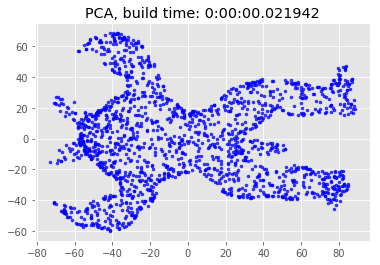

In [16]:
# Render the newly transformed PCA armadillo
t1 = datetime.datetime.now()
pca = do_PCA(armadillo)
time_delta = datetime.datetime.now() - t1
if not pca is None:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.set_title('PCA, build time: ' + str(time_delta))
  ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)

# Lab Assignment 2

In [ ]:
###  dataset website
# https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

In [18]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing

In [19]:
# Look pretty...
matplotlib.style.use('ggplot')

In [34]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [20]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = False

Load up the dataset specified on the lab instructions page and remove any and all rows that have a NaN in them. You should be a pro at this by now ;-)

QUESTION: Should the id column be included in your dataset as a feature?

In [22]:
df = pd.read_csv("kidney_disease.csv", index_col="id")
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,ckd


Let's build some color-coded labels; the actual label feature will be removed prior to executing PCA, since it's unsupervised. You're only labeling by color so you can see the effects of PCA

In [23]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

Use an indexer to select only the following columns: [ 'bgr' , 'wc' , 'rc' ]

In [24]:
df = df[['bgr','wc','rc']]
df.head()

,bgr,wc,rc
0,117.0,6700,3.9
1,70.0,12100,3.7
2,380.0,4500,3.8
3,157.0,11000,2.6
4,173.0,9200,3.2


In [25]:
# check data types
df['wc'] = pd.to_numeric(df.wc, errors="raise")
df['rc'] = pd.to_numeric(df.rc, errors="raise")
df.dtypes

bgr    float64
wc       int64
rc     float64
dtype: object

In [28]:
df.var()

bgr    4.217182e+03
wc     9.777380e+06
rc     1.039104e+00
dtype: float64

In [29]:
df.describe()

,bgr,wc,rc
count,158.000000,158.000000,158.000000
mean,131.341772,8475.949367,4.891772
std,64.939832,3126.880181,1.019364
min,70.000000,3800.000000,2.100000
25%,97.000000,6525.000000,4.500000
50%,115.500000,7800.000000,4.950000
75%,131.750000,9775.000000,5.600000
max,490.000000,26400.000000,8.000000


This method assumes your dataframe is called df. If it isn't, make the appropriate changes. Don't alter the code in scaleFeatures() just yet though!

In [30]:
if scaleFeatures: df = helper.scaleFeatures(df)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)

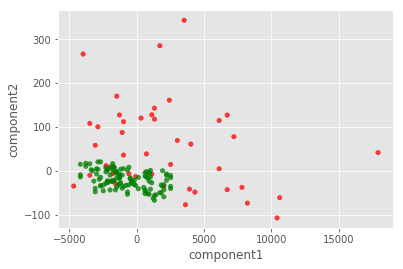

In [37]:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()

# Lab Assignment 3

In [38]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn import preprocessing

In [39]:
# Look pretty...

matplotlib.style.use('ggplot')
plt.style.use('ggplot')

In [40]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = True

In [41]:
df = pd.read_csv("kidney_disease.csv")
df.dropna(inplace=True)

Let's build some color-coded labels; the actual label feature will be removed prior to executing PCA, since it's unsupervised. You're only labeling by color so you can see the effects of PCA:

In [42]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

Use an indexer to select only the following columns: [ 'bgr' , 'wc' , 'rc' ]

In [43]:
df.drop(['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis=1, inplace=True)
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32,4500,3.8
14,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,16,11000,2.6
20,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,24,9200,3.2


In [44]:
# check data type
df['pcv'] = pd.to_numeric(df.pcv, errors="coerce")
df['wc'] = pd.to_numeric(df.wc, errors="coerce")
df['rc'] = pd.to_numeric(df.rc, errors="coerce")
df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv       int64
wc        int64
rc      float64
dtype: object

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver="full")
pca.fit(df)
T = pca.transform(df)

Features by importance:
 [(17924.128618951454, 'wc'), (309.76849192706095, 'bgr'), (133.46056989041804, 'bu'), (29.87221006491562, 'pcv'), (26.926061274625223, 'age'), (15.347914056465731, 'sod'), (14.72804124386202, 'bp'), (9.269250137352325, 'hemo'), (8.31535506280234, 'sc'), (4.812724634846466, 'al'), (3.854930172100135, 'pot'), (2.9505709631743606, 'rc'), (2.939424816655473, 'su'), (0.01819490087551398, 'sg')]


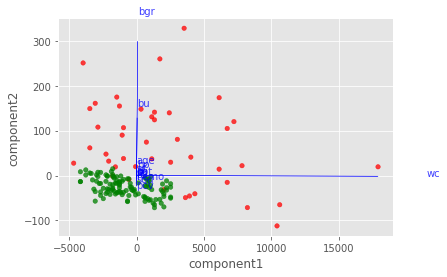

In [48]:
# Since we transformed via PCA, we no longer have column names; but we know we
# are in `principal-component` space, so we'll just define the coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)

plt.show()